# Regularization and logistic regression
### BitTiger DS501 Week 3 HW    Meina Wang

## Question 1

Suppose we fit “Lasso Regression” to a data set, which has 100 features (X1,X2…X100). Now,
we rescale one of these feature by multiplying with 10 (say that feature is X1), and then refit
Lasso regression with the same regularization parameter.
Now, which of the following option will be correct?<br>
A. It is more likely for X1 to be excluded from the model<br>
B. It is more likely for X1 to be included in the model<br>
C. Can’t say<br>
D. None of these<br>


## Answer 1

B. 

Multiplying the feature by 10 will lead to smaller coefficient assigned to this feature.  Smaller coef will have less penalty by LASSO, thus would be more likely to be included in the model.


## Question 2

Suppose you have fitted a multiple regression model on a dataset. Now, you are using Ridge
regression with tuning parameter lambda to reduce its complexity. Choose the options below
which describes relationship of bias and variance with lambda.<br>
A. In case of very large lambda; bias is low, variance is low<br>
B. In case of very large lambda; bias is low, variance is high<br>
C. In case of very large lambda; bias is high, variance is low<br>
D. In case of very large lambda; bias is high, variance is high<br>

## Answer 2

C.

Very large lambda would penaliza the parameters heavily, thus decreasing variance, but increasing bias (likely to underfit)

## Question 3

Write a function to realize gradient descent in R. Understand how learning rate affects
convergence.

## Answer 3

From class slides, gradient descent steps:<br>
● Step 0: find an initial $\beta_j^{(0)}$<br>
● Step 1: $\beta_j^{(t + 1)} := \beta_j^{(t)} - \eta\frac{\partial l(\beta)}{\partial \beta_j}$, where $\eta$ is learning rate, and $\frac{\partial l(\beta)}{\partial \beta_j}$ is gradient. <br>
● step 2: check if $\Delta_\beta l(\beta) \leq \epsilon$, where $\epsilon$ is the convergence threshold.  If not, repeat step 1.

In [2]:
gradientDescent<-function(y, X, learning_rate, convergence_threshold, iters){

    X = as.matrix(data.frame(rep(1,length(y)),X))
    N = dim(X)[1]
    beta.init = as.matrix(rnorm(n=dim(X)[2], mean=0,sd = 1)) # initialize beta
    beta.init = t(beta.init)
    error = t(y) - beta.init%*%t(X)
    grad.init = -(2/N)%*%(error)%*%X # initialize gradient # %*% is operator for the product of two matrices
    beta = beta.init - learning_rate*(1/N)*grad.init
    convergence_threshold = 0.0001
    for(i in 1:iters){ # starts from 1
        error = t(y) - beta%*%t(X)
        grad = -(2/N)%*%error%*%X
        beta = tbeta - learning_rate*(2/N)*grad
        if(sqrt(sum(grad^2)) <= convergence_threshold){
            break
        }
    }
  print("Algorithm converged")
  print(paste("Final gradient norm is",sqrt(sum(grad^2))))
  values<-list("coef" = t(beta), "l2loss" = l2loss)
  return(values)
}

Learning rate determines how fast or slow each step takes towards the optimal weights (minimize cost function). If learning rate is very large we will skip the optimal solution (global minimum). If it is too small we might be trapped at local minimum, or will need too many iterations to converge to the best values.

## Question 4

A five year follow-up study on 600 disease free subjects was carried out to assess the effect of
whether having exposure E or not (of smoking for example) on the development (or not) of a
certain disease. The variables AGE (continuous) and obesity status (boolean), which were
determined at the start of the follow-up and were to be considered as control variables in
analyzing the data.<br>
(1) State the logit form of a logistic regression model that assesses the effect of the 0/1
exposure variable E controlling for the confounding effects of AGE and OBS and the interaction
effects of AGE with E and OBS with E.<br>
(2) Given above model you have, give a formula for the odds ratio for the exposure-disease
relationship that controls for the confounding and interactive effects of AGE and OBS.<br>
(3) Now use the formula from above to write an expression for the estimated odds ratio for the
exposure-disease relationship when AGE=40 and OBS=1.<br>

## Answer 4

(1) <br>
$logit(P) = \beta_0 + \beta_1*E + \beta_2*AGE + \beta_3*OBS + \beta_4*AGE*E + \beta_5*OBS*E$ <br>
P is the probability of the development of a certain disease.<br>
E is the exposure variable, and AGE and OBS are the control variables. $\beta$ is the coefficient for each variable. <br>
The last two terms on the right hand side of the equation above are interaction effects of AGE with E and OBS with E.


(2)<br>
Odds ratio for the exposure-disease relationship = $\frac{p}{1-p}$ = $\frac{probability\ of\ disease\ WITH\ exposure}{probability\ of\ disease\ WITHOUT\ exposure}$ <br>

$logit(P) = log(\frac{p}{1-p}) = log(odds)$<br>
Taking e to the power to both sides of the above equation yields, <br>
$e^{log(odds)} = odds = e^{log(\frac{p}{1-p})}$<br>


Thus, the odds ratio for comparing WITH and WITHOUT exposure is<br>
$\frac{odds_{WITH\ exposure}}{odds_{WITHOUT\ exposure}} = \frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}} = exp(logit(P_1))/exp(logit(P_2)) = exp(logit(P_1) - logit(P_2)) = $ <br>
$exp((\beta_0 + \beta_1*1 + \beta_2*AGE_! + \beta_3*OBS_1 + \beta_4*AGE_1*1 + \beta_5*OBS_1*1) - (\beta_0 + \beta_1*0 + \beta_2*AGE_2 + \beta_3*OBS_2 + \beta_4*AGE_2*0 + \beta_5*OBS_2*0)) = $<br>
$exp((\beta_0 + \beta_1 + \beta_2*AGE_1 + \beta_3*OBS_1 + \beta_4*AGE_1 + \beta_5*OBS_1) - (\beta_0 + \beta_2*AGE_2 + \beta_3*OBS_2)) = $<br>
$exp(\beta_1 + \beta_2*(AGE_1 - AGE_2) + \beta_3*(OBS_1 - OBS_2) + \beta_4*AGE + \beta_5*OBS)$<br>

Therefore, the odds ratio is $exp(\beta_1 + \beta_2*(AGE_1 - AGE_2) + \beta_3*(OBS_1 - OBS_2) + \beta_4*AGE + \beta_5*OBS)$, where subscript 1 indicates the AGE and OBS values when E is WITH exposure, while subscript 2 indicates the values when E is WITHOUT exposure.

(3)<br>
Plug in AGE = 40 and OBS = 1 into the equation from (2) yields, <br>
$exp(\beta_1 + \beta_2*(40 - 40) + \beta_3*(1 - 1) + \beta_4*40 + \beta_5*1) = $<br>
$exp(\beta_1 + \beta_4*40 + \beta_5*1)$

## Question 5

Build the best logistic regression model to predict loan will be default (delay) or not. Add
regularization to control for multicollinearity.

## Answer 5

In [1]:
# load the data
loan <- read.csv("/users/meinawang/Documents/bittiger/DS501/lending-club-loan-data/loan.csv", stringsAsFactors = FALSE)
loanT <- loan

In [2]:
# select only features with no more than 20% missing data
loan$dti <- ifelse(!is.na(loan$dti_joint), loan$dti_joint, loan$dti)
loan$annual_inc <- ifelse(!is.na(loan$annual_inc_joint), loan$annual_inc_joint, loan$annual_inc)
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
remain.col <- names(num.NA)[which(num.NA <= 0.8 * dim(loan)[1])]
loan <- loan[, remain.col]

In [3]:
# based on last week's hw, log transform features so that they are close to normal distribution.
loan$home_ownership <- ifelse(loan$home_ownership %in% c('ANY', 'NONE', 'OTHER'), 'OTHER',
                              loan$home_ownership)
int_state <- by(loan, loan$addr_state, function(x) {
  return(mean(x$int_rate))
})
loan$state_mean_int <-
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <=
                                                       quantile(int_state, 0.25))], 'low',
         ifelse(loan$addr_state %in% names(int_state)[which(int_state <=
                                                              quantile(int_state, 0.5))],'lowmedium',
                ifelse(loan$addr_state %in% names(int_state)[which(int_state <= quantile(int_state, 0.75))], 
                       'mediumhigh', 'high')))
loan$tot_cur_bal[which(is.na(loan$tot_cur_bal))] <- median(loan$tot_cur_bal, na.rm = T)
loan$total_acc[which(is.na(loan$total_acc))] <- median(loan$total_acc, na.rm = T)
loan$open_acc[which(is.na(loan$open_acc))] <- median(loan$open_acc, na.rm = T)
loan$annual_inc[which(is.na(loan$annual_inc))] <- median(loan$annual_inc, na.rm = T)
loan$tot_coll_amt[which(is.na(loan$tot_coll_amt))] <- median(loan$tot_coll_amt, na.rm = T)
loan$inq_last_6mths[which(is.na(loan$inq_last_6mths))] <- median(loan$inq_last_6mths, na.rm = T)
loan$log_annual_inc <- log(loan$annual_inc + 1)
loan$log_last_pymnt_amnt <- log(loan$last_pymnt_amnt + 1)
loan$log_tot_coll_amt <- log(loan$tot_coll_amt + 1)
loan$total_rev_hi_lim_log = log(loan$total_rev_hi_lim + 1)
loan$total_rec_int_log = log(loan$total_rec_int + 1)

In [4]:
# check the levels from feature loan_status
loan$loan_status <- gsub('Does not meet the credit policy. Status:', '', loan$loan_status)
sort(table(loan$loan_status))

nums <- sapply(loan, is.numeric)
loan_nums <- loan[, nums]

categories <- sapply(loan, is.character)
loan_categories <- loan[, categories]


           Default  Late (16-30 days)    In Grace Period             Issued 
              1219               2357               6253               8460 
Late (31-120 days)        Charged Off         Fully Paid            Current 
             11591              46009             209711             601779 

In [6]:
# Convert the levels in loan_status into binary, 'Default', 'Charged Off', 'Late (16-30 days)','In Grace Period',
#'Late (31-120 days)','Charged Off' are 1, the rest levels are 0.

loan$loan_status_binary <- with(loan, ifelse(loan_status  %in% c('Default', 'Charged Off', 'Late (16-30 days)',
                                                                 'In Grace Period','Late (31-120 days)',
                                                                 'Charged Off'), 1, 0))
table(loan$loan_status_binary)

loan$loan_status_binary = factor(loan$loan_status_binary)
levels(loan$loan_status_binary)


     0      1 
819950  67429 

[1] "0" "1"

In [20]:
# check the pdf of features, and see if they are normal.
library(repr)

# Change plot size to 6 x 3
options(repr.plot.width=6, repr.plot.height=3)


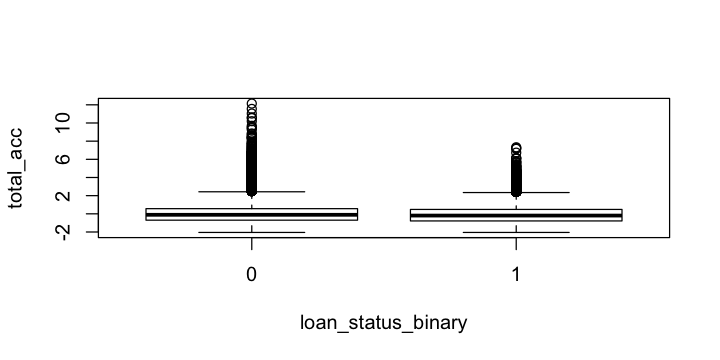

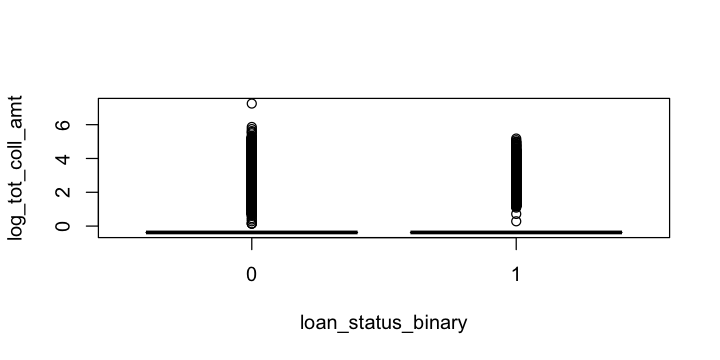

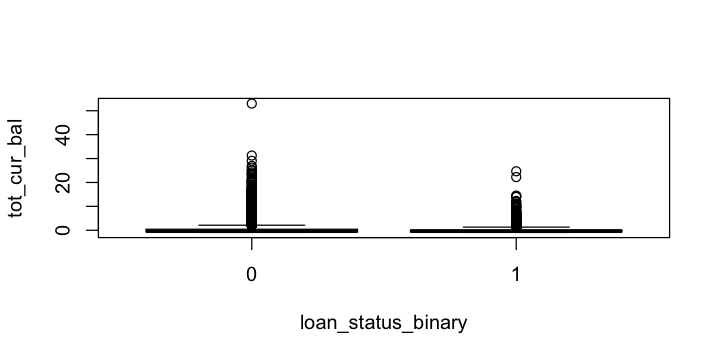

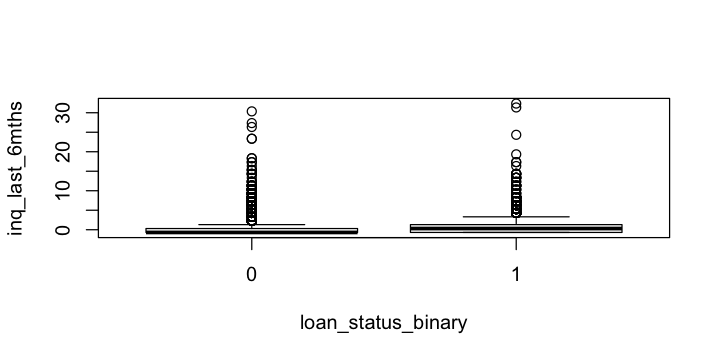

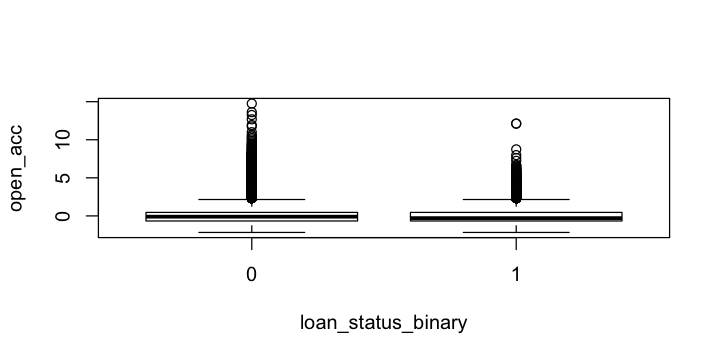

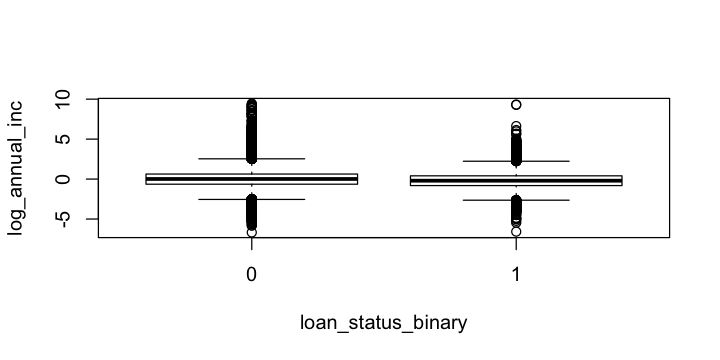

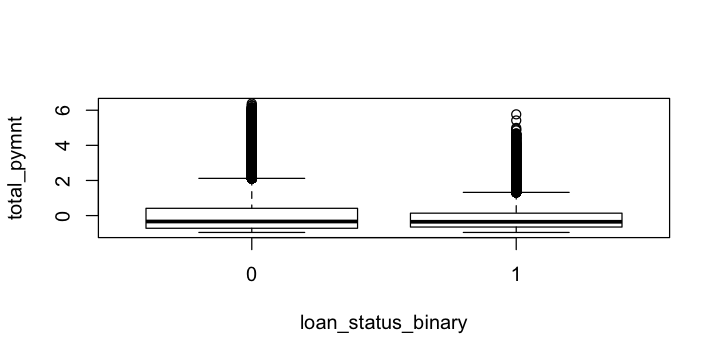

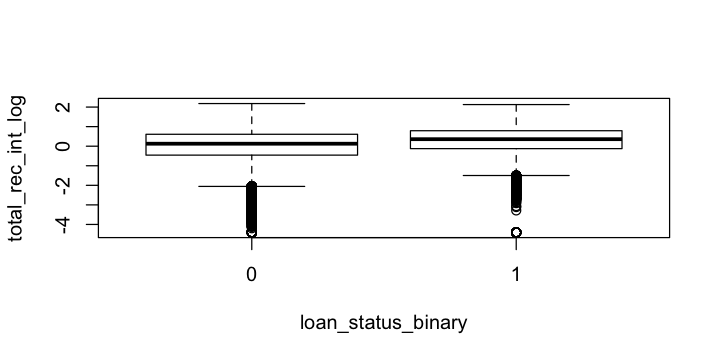

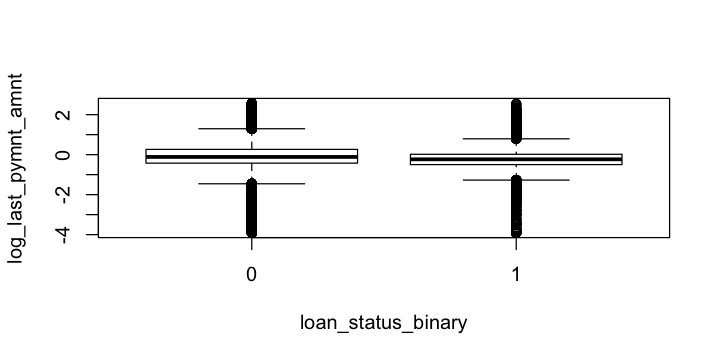

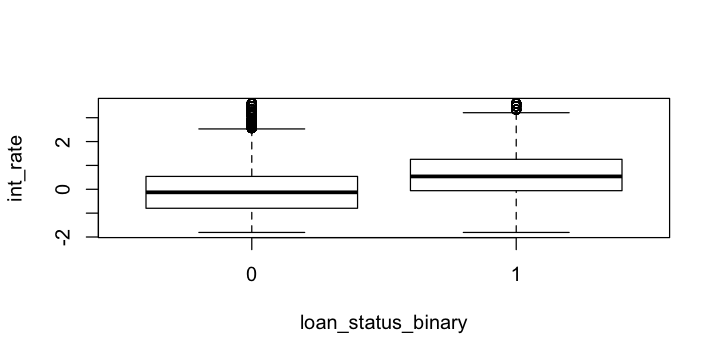

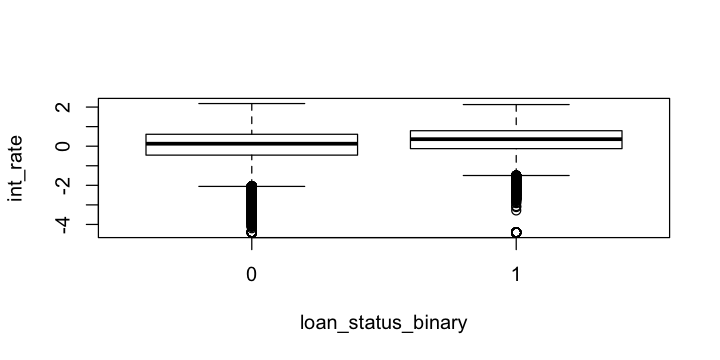

In [22]:
# check how the numerical features response to loan_status_binary
boxplot(total_acc ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='total_acc')
boxplot(log_tot_coll_amt ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='log_tot_coll_amt')
boxplot(tot_cur_bal ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='tot_cur_bal')
boxplot(inq_last_6mths ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='inq_last_6mths')
boxplot(open_acc ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='open_acc')
boxplot(log_annual_inc ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='log_annual_inc')
boxplot(total_pymnt ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='total_pymnt')
boxplot(total_rec_int_log ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='total_rec_int_log')
boxplot(log_last_pymnt_amnt ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='log_last_pymnt_amnt')
boxplot(int_rate ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='int_rate')
boxplot(total_rec_int_log ~ loan_status_binary, data = loan,xlab='loan_status_binary',ylab='int_rate')

In [12]:
library(MASS)
# compute the chi square value between categorical features with loan_status_binary
chisq.test(table(loan$term, loan$loan_status_binary))
chisq.test(table(loan$home_ownership, loan$loan_status_binary))
chisq.test(table(loan$application_type, loan$loan_status_binary))
chisq.test(table(loan$pymnt_plan, loan$loan_status_binary))
chisq.test(table(loan$state_mean_int, loan$loan_status_binary))
chisq.test(table(loan$emp_length, loan$loan_status_binary))




	Pearson's Chi-squared test with Yates' continuity correction

data:  table(loan$term, loan$loan_status_binary)
X-squared = 1390.6, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(loan$home_ownership, loan$loan_status_binary)
X-squared = 1333.6, df = 3, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(loan$application_type, loan$loan_status_binary)
X-squared = 30.979, df = 1, p-value = 2.609e-08


Warning message in chisq.test(table(loan$pymnt_plan, loan$loan_status_binary)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(loan$pymnt_plan, loan$loan_status_binary)
X-squared = 19.923, df = 1, p-value = 8.061e-06



	Pearson's Chi-squared test

data:  table(loan$state_mean_int, loan$loan_status_binary)
X-squared = 150.14, df = 3, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(loan$emp_length, loan$loan_status_binary)
X-squared = 512.67, df = 11, p-value < 2.2e-16


In [13]:
library(glmnet) # can only take matrix

Loading required package: Matrix
Loading required package: foreach
Warning message:
“package ‘foreach’ was built under R version 3.4.3”Loaded glmnet 2.0-13



In [14]:
# scale (normalize) all the numerical features before doing train / test split.
nums <- sapply(loan, is.numeric)
loan[nums] <- lapply(loan[nums], scale)

summary(loan)

 mths_since_last_major_derog mths_since_last_delinq  tot_coll_amt    
 Min.   :  0.0               Min.   :  0.0          Min.   :      0  
 1st Qu.: 27.0               1st Qu.: 15.0          1st Qu.:      0  
 Median : 44.0               Median : 31.0          Median :      0  
 Mean   : 44.1               Mean   : 34.1          Mean   :    208  
 3rd Qu.: 61.0               3rd Qu.: 50.0          3rd Qu.:      0  
 Max.   :188.0               Max.   :188.0          Max.   :9152545  
 NA's   :665676              NA's   :454312                          
  tot_cur_bal      total_rev_hi_lim    revol_util    
 Min.   :      0   Min.   :      0   Min.   :  0.00  
 1st Qu.:  32246   1st Qu.:  13900   1st Qu.: 37.70  
 Median :  80559   Median :  23700   Median : 56.00  
 Mean   : 134794   Mean   :  32069   Mean   : 55.07  
 3rd Qu.: 195794   3rd Qu.:  39800   3rd Qu.: 73.60  
 Max.   :8000078   Max.   :9999999   Max.   :892.30  
                   NA's   :70276     NA's   :502     
 collect

 mths_since_last_major_derog.V1 mths_since_last_delinq.V1  tot_coll_amt.V1  
 Min.   :-2.0                   Min.   :-1.6              Min.   : -0.0210  
 1st Qu.:-0.8                   1st Qu.:-0.9              1st Qu.: -0.0210  
 Median : 0.0                   Median :-0.1              Median : -0.0210  
 Mean   : 0.0                   Mean   : 0.0              Mean   :  0.0000  
 3rd Qu.: 0.8                   3rd Qu.: 0.7              3rd Qu.: -0.0210  
 Max.   : 6.5                   Max.   : 7.0              Max.   :924.9616  
 NA's   :665676                 NA's   :454312                              
   tot_cur_bal.V1   total_rev_hi_lim.V1   revol_util.V1  
 Min.   :-0.90837   Min.   : -0.86      Min.   :-2.3104  
 1st Qu.:-0.69106   1st Qu.: -0.48      1st Qu.:-0.7287  
 Median :-0.36548   Median : -0.22      Median : 0.0391  
 Mean   : 0.00000   Mean   :  0.00      Mean   : 0.0000  
 3rd Qu.: 0.41108   3rd Qu.:  0.21      3rd Qu.: 0.7775  
 Max.   :53.00373   Max.   :265.82  

In [15]:
set.seed(1)
train.ind <- sample(1:dim(loan)[1], 0.7 * dim(loan)[1])
train <- loan[train.ind, ]
dim(train)
test <- loan[-train.ind, ]


[1] 621165     64

In [16]:
# select the numerical/categorical features that are responsive to loan_status_binary
train.sub <- train[, c('loan_status_binary','total_acc', 'tot_cur_bal','inq_last_6mths', 'loan_amnt', 'dti',
                       'int_rate', 'total_pymnt', 'total_rec_int_log', 'log_last_pymnt_amnt', 'log_annual_inc',
                       'open_acc','log_tot_coll_amt','term', 'home_ownership',  'application_type', 
                       'state_mean_int','emp_length')]

test.sub <- test[, c('loan_status_binary','total_acc', 'tot_cur_bal','inq_last_6mths', 'loan_amnt', 'dti',
                      'int_rate', 'total_pymnt', 'total_rec_int_log', 'log_last_pymnt_amnt', 'log_annual_inc',
                      'open_acc','log_tot_coll_amt','term', 'home_ownership',  'application_type', 
                     'state_mean_int','emp_length')]


In [17]:
# convert to matrixes as required by glmnet.
ind <- train.sub[, -1]
ind <- model.matrix(~., ind)

dim(ind)
summary(ind)
dep <- train.sub[, 1]
dep <- as.matrix(dep)
summary(dep)
dim(dep)
typeof(dep)

[1] 621165     32

  (Intercept)   total_acc          tot_cur_bal        inq_last_6mths    
 Min.   :1    Min.   :-2.049597   Min.   :-0.908367   Min.   :-0.69569  
 1st Qu.:1    1st Qu.:-0.698288   1st Qu.:-0.690787   1st Qu.:-0.69569  
 Median :1    Median :-0.107090   Median :-0.365485   Median :-0.69569  
 Mean   :1    Mean   : 0.001167   Mean   : 0.000883   Mean   :-0.00137  
 3rd Qu.:1    3rd Qu.: 0.568565   3rd Qu.: 0.413477   3rd Qu.: 0.30588  
 Max.   :1    Max.   :11.041210   Max.   :31.253584   Max.   :30.35277  
   loan_amnt               dti                int_rate        
 Min.   :-1.6899223   Min.   :-2.1844292   Min.   :-1.808987  
 1st Qu.:-0.8008180   1st Qu.:-0.7503527   1st Qu.:-0.743231  
 Median :-0.2080818   Median :-0.0574165   Median :-0.058591  
 Mean   : 0.0000272   Mean   :-0.0004977   Mean   :-0.000683  
 3rd Qu.: 0.6217489   3rd Qu.: 0.6993902   3rd Qu.: 0.673973  
 Max.   : 2.3999576   Max.   : 3.1011671   Max.   : 3.592820  
  total_pymnt        total_rec_int_log   log_las

 V1        
 0:574004  
 1: 47161  

[1] 621165      1

[1] "character"

33 x 1 sparse Matrix of class "dgCMatrix"
                                   1
(Intercept)              -2.76725511
(Intercept)               .         
total_acc                 0.05938371
tot_cur_bal              -0.06117577
inq_last_6mths            0.16271536
loan_amnt                 0.28691614
dti                      -0.04946683
int_rate                  0.55755441
total_pymnt              -0.54998352
total_rec_int_log         0.82338753
log_last_pymnt_amnt      -0.87092358
log_annual_inc           -0.11254141
open_acc                 -0.06106200
log_tot_coll_amt         -0.10893522
term 60 months           -0.67964146
home_ownershipOTHER       0.68068415
home_ownershipOWN        -0.05372664
home_ownershipRENT        0.06047789
application_typeJOINT    -0.83170926
state_mean_intlow        -0.07241401
state_mean_intlowmedium   0.01656687
state_mean_intmediumhigh  .         
emp_length1 year          .         
emp_length10+ years      -0.09469249
emp_length2 years         .      

33 x 1 sparse Matrix of class "dgCMatrix"
                                    1
(Intercept)              -2.718571527
(Intercept)               .          
total_acc                 .          
tot_cur_bal              -0.034258341
inq_last_6mths            0.135462977
loan_amnt                 0.102038385
dti                       .          
int_rate                  0.529893971
total_pymnt              -0.331254575
total_rec_int_log         0.613571692
log_last_pymnt_amnt      -0.686113938
log_annual_inc           -0.040403510
open_acc                 -0.008251434
log_tot_coll_amt         -0.069412048
term 60 months           -0.395110780
home_ownershipOTHER       .          
home_ownershipOWN         .          
home_ownershipRENT        0.045449241
application_typeJOINT     .          
state_mean_intlow         .          
state_mean_intlowmedium   .          
state_mean_intmediumhigh  .          
emp_length1 year          .          
emp_length10+ years      -0.052798159
emp_leng

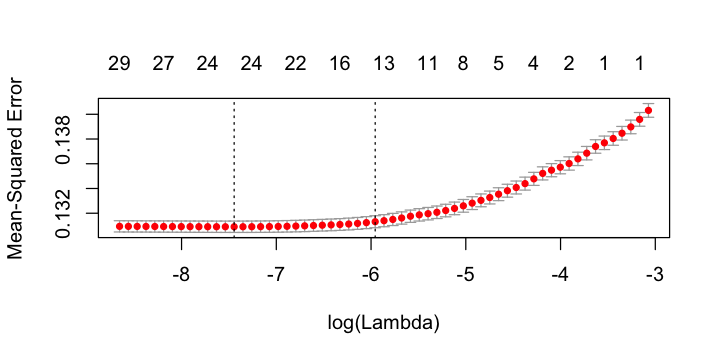

In [18]:
# cross-validation with glmnet for logistic regression
cvfit <- cv.glmnet(ind, dep, family = "binomial", type.measure = "mse")
plot(cvfit)
coef(cvfit, s="lambda.min")
coef(cvfit, s="lambda.1se")

In [21]:
# apply the model with cvfit$lambda.min to test data
ind_test <- test.sub[, -1]
x_test <- model.matrix(~.,ind_test)
dep_test <- test.sub[, 1]
y_test <- as.matrix(dep_test)
#predict class, type=”class”
lasso_prob <- predict(cvfit,newx = x_test,s=cvfit$lambda.min,type="response")
#translate probabilities to predictions
lasso_predict <- rep("neg",nrow(ind_test))
lasso_predict[lasso_prob>.5] <- "pos"
#confusion matrix
table(pred=lasso_predict,true=test.sub$loan_status_binary)


     true
pred       0      1
  neg 245732  20124
  pos    214    144